Submit a Jupyter notebook containing Python code that trains two different models, each using different learning algorithm, and compares the performance of the two learning algorithms and/or the two learned models.

At least one of your models must be produced either by logistic regression or by a support vector machine (SVM). You could compare logistic regression to SVM, or you could compare one of these to a perceptron or Adaline model. You may use the scikit-learn implementations of the models, or the "from scratch" implementations presented in our textbook and in class, or implementations that you write yourself.

The dataset that you use must include at least 500 instances. Note that some of the datasets included in scikit-learn meet this requirement, and it is fine to use one of those. You may use a dataset that you used in a previous assignment, if it includes at least 500 instances, and you may also use the same dataset as a fellow student, as long as you don't use the same dataset and perform the same comparisons as anyone else in the class, as far as you know.

For this assignment you must split your data into training and testing sets, and show how your trained models perform on each. Possible criteria for comparison include accuracy on the test set, convergence time, and robustness to changes in parameters, but this is not an exhaustive list; you should feel free to compare the algorithms/models in any meaningful way.

Be sure to include the following information in markdown cells in your notebook:

A description of the data that you are using

A description of classification task that you are training your models to perform

The two learning algorithms that you have compared

A description of the basis on which you compared them

The results of the comparison

You are encouraged to collaborate with classmates in completing this assignment, but you should acknowledge all help that you have received in your notebook file.

You can assume that your code will be run in a Python 3.8 environment in which numpy, matplotlib, pandas, and scikit-learn have been installed. Do not assume or require the installation of any other libraries.

Your should submit your notebook (.ipynb) file, your data file (probably a .csv file), and any other files that your code requires.

This project is a comparision between a support vector machine (SVM) vs Perceptron vs Logistic regression

In [207]:
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The data we are using is from a stock market dataset. X1 is the opening value of the stock and X2 is the highest trading price that day. The two stocks we are using are microsoft and tesla. Tesla is 1 and Microsoft is 0

In [208]:
train = pd.read_csv("stock_test.csv", nrows=500)
print(train)

a = train.to_numpy()

X = a[:, [0, 1]]

y = a[:, 2]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train) ## Note that we standard only on the basis of the training set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

           Open        High  type
0     29.280001   29.889999     1
1     83.660004   83.940002     0
2     27.660000   28.770000     1
3     20.610001   21.000000     1
4     28.020000   28.059999     1
..          ...         ...   ...
495  109.419998  109.690002     0
496   93.300003   93.660004     0
497   32.570000   33.990002     1
498  103.599998  104.430000     0
499   95.139999   95.449997     0

[500 rows x 3 columns]


In [209]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[], #c='', ## CHANGED TO AVOID A WARNING
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

We are training the classifiers to preditct if the stock is either Tesla(1) or Microsoft(0) based on the opening and high price.

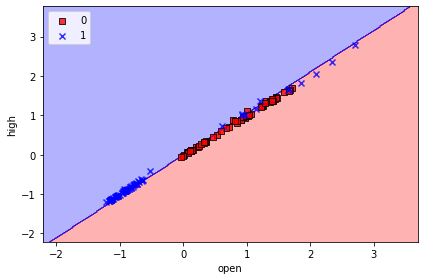

Misclassified examples: 13


In [210]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=2000, random_state=5, solver='lbfgs')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test,
                     classifier=lr)
plt.xlabel('open')
plt.ylabel('high')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = lr.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


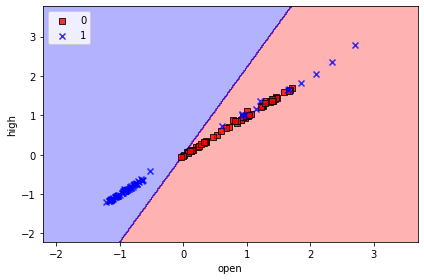

Misclassified examples: 13


In [211]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test,
                     classifier=ppn)
plt.xlabel('open')
plt.ylabel('high')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

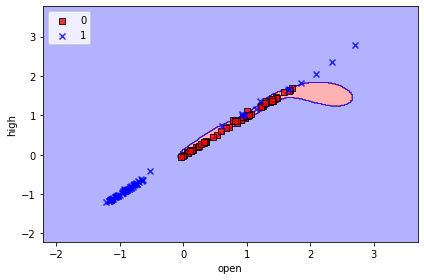

Misclassified examples: 7


In [212]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=1, C=100000.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test, 
                      classifier=svm)
plt.xlabel('open')
plt.ylabel('high')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = svm.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

As you can see linear regression misclassified 13 examples, perceptrons misclasified 13 examples and SVC misclassified 7 examples in the test set
So for this dataset SVC is a better option